In [1]:
#Import the necessary libraries

import numpy as np               #Importing numpy library in the background
import pandas as pd              #Importing pandas library in the background
import matplotlib.pyplot as plt  #This liibrary for data visualization
import seaborn as sns            #This liibrary for data visualization     

In [2]:
#Now load the data to see it

loans = pd.read_csv('loan.csv', header =0)
loans.head()  #Use head to see the first five rows of the loans dataset

/var/folders/qf/lb14_4ds6fv7r33ppp80kf3c0000gn/T/ipykernel_946/657356943.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('loan.csv', header =0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Understanding the loans dataset

- Use _shape_ to know the rows and columns in the dataset
- Use _describe_ to see values in each column
- Also, use _info_ to know columns instead of describe
- Or, use _dtypes_ to only know the dtypes of the columns


In [3]:
#Use shape

loans.shape

(39717, 111)

### Comment

- The loans dataset has 39717 rows and 111 columns

In [4]:
#Use describe

loans.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

### Comment

- Notice the number of null value columns in the dataset

In [5]:
# Use dtypes to further know about the columns of loans

loans.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

- Because of the huge length of the columns, we could only see dtypes for the first five rows and for the last five rows. However, we'll check the dtypes again once we start cleaning the data

# Data Cleaning

## Missing Values 

Next in the process is to understand the missing values in the columns and address them by removing them. We follow a certain standard here. If the missing values in a coulmn is above 80 to 85 percent, just say goodbye to it.

- Calculate the percentage of missing values
- Remove the columns with high percent of missing values


In [6]:
#Check the null value percentage by the following code. Name it.

null_columns = loans.isnull().sum() / loans.shape[0] * 100.00

In [7]:
#Print those columns
null_columns

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [8]:
#Check the null value percentage columns with more than 80 percent

null_columns[null_columns>80]

mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl                       100.000000
inq_last_1

In [9]:
# Drop null coulmns above 80 percent values

loans = loans.dropna(thresh=loans.shape[0]*0.8, how='all',axis=1)

In [10]:
#Now check the shape of the loans dataset
loans.shape

(39717, 53)

In [11]:
#Print the loans to have a glance
loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### Comment

- After dropping the null values columns with above 80% values, we've checked the rows and coulmns of the loans dataset. The columns now are 53 only.
- We can still see some of the null value coulmns just by glancing the dataset

Let's clean the data further by removing the columns that are 'not-so-important' to our analysis

- Some of these columns may fall under the customer behaviour which we only know post the processing of the loan. So these columns are not useful for analysis of finding signs for 'loan default'.

In [12]:
# See the columns in the loans data set to identify those useless columns in this context

loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [13]:
# Remove the following columns

loans = loans.drop(['member_id','emp_title','pymnt_plan', 'url','title',
       'zip_code','earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'], axis = 1)

In [14]:
#Now print the loans and check it shape
loans

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,1
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0


In [15]:
#Shape of the columns now after dropping the 'not-so-useful' columns in our context

loans.shape

(39717, 19)

In [16]:
#Further we can remove two more columns as they seem unfit for our in this context

loans = loans.drop(['installment','delinq_2yrs'], axis=1)

In [17]:
#Print loans
loans

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,1077175,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,1075358,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33
39713,90665,8500,8500,875.0,36 months,10.28%,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40
39714,90395,5000,5000,1325.0,36 months,8.07%,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30
39715,90376,5000,5000,650.0,36 months,7.43%,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72


### Comment

As we can see in the loans dataset, now we have 17 columns after removing null value columns and 'not-so-useful' ones in this context.

## Cleans Rows with Loan Status as 'Current'

Now the rows with the loan status as *Current* cannot be used for our study of analysis. Why? Because there is 50-50 probability of loan defaulting from these users. So we can't use them for our analysis. Now take these rows away.

In [18]:
#Get the rows with loan status as 'Current'

loans[loans['loan_status']=='Current']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
4,1075358,3000,3000,3000.00000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94
32,1065420,10000,10000,9975.00000,60 months,15.96%,C,C5,2 years,RENT,29120.0,Verified,Dec-11,Current,debt_consolidation,FL,22.83
39,1069346,12500,12500,12475.00000,60 months,12.69%,B,B5,1 year,RENT,27000.0,Verified,Dec-11,Current,debt_consolidation,IL,16.04
86,1063958,14000,14000,13975.00000,60 months,17.27%,D,D3,4 years,RENT,28000.0,Verified,Dec-11,Current,other,WA,6.34
95,1068575,15300,15300,15275.00000,60 months,22.06%,F,F4,6 years,RENT,85000.0,Verified,Dec-11,Current,credit_card,VA,20.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,10400,10400,10400.00000,60 months,6.00%,E,E3,5 years,MORTGAGE,29000.0,Source Verified,May-11,Current,credit_card,TX,10.84
15981,738420,6000,6000,6000.00000,60 months,10.37%,B,B3,1 year,RENT,24000.0,Source Verified,Apr-11,Current,car,NY,11.05
16361,733695,19200,19200,18847.76292,60 months,10.74%,B,B4,5 years,MORTGAGE,100000.0,Verified,Apr-11,Current,small_business,NJ,4.43
16609,728422,9350,9350,9350.00000,60 months,10.00%,B,B2,8 years,RENT,66000.0,Not Verified,Apr-11,Current,car,NY,4.84


### Comment

There are about 1140 'Current' loans. Remove them off. 

In [19]:
#Drop the 'Current' rows from the loan status

loans = loans[loans.loan_status != 'Current']

In [20]:
#Print loans again and see

loans

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,1077175,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,1075269,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33
39713,90665,8500,8500,875.0,36 months,10.28%,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40
39714,90395,5000,5000,1325.0,36 months,8.07%,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30
39715,90376,5000,5000,650.0,36 months,7.43%,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72


In [21]:
#See shape of loans after dropping the those rows

loans.shape

(38577, 17)

## Standardise the Columns

So far we have removed the unnecessary columns and rows for our analysis. Now in this part, let's us standardise the columns by removing strings in them and coverting the columns to theirs types where necessary.

In [22]:
#Now let's standardise 'term', 'int_rate', and 'issue_d' columns

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

loans["term"] = loans["term"].str.replace("months", "") 
loans["int_rate"] = loans["int_rate"].str.replace("%","")
loans["issue_d"] = pd.to_datetime(loans["issue_d"], format="%b-%y")

In [23]:
loans

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,4975.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00
2,1077175,2400,2400,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00
5,1075269,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,A,A4,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33
39713,90665,8500,8500,875.0,36,10.28,C,C1,3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40
39714,90395,5000,5000,1325.0,36,8.07,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30
39715,90376,5000,5000,650.0,36,7.43,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72


### Comment

- Removed string from 'term' column
- Removed '%' from 'int_rate' column
- Converted 'issue_d' to Datetime dtype

We get a *SettingsWithCopyWarning*, but make it none using the code

In [24]:
#Now let's check the dtypes of loans dataset

loans.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
dtype: object

### Comment

Despite removing the unwated things from 'term' and 'int_rate', the column dtypes are still not changed. So let's change them now.

In [25]:
#Convert 'term' and 'int_rate' to their respective dtypes

loans = loans.astype({"term":"int", "int_rate":"float"})

In [26]:
loans.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
dtype: object

### Comment

Now we have standardised the columns. It looks perfect to begin our analysis. But before that let's have a look at the employee length column. If it contains null values, we leave it aside. If there are no null values, we also standardise it.

In [27]:
loans['emp_length'].isna().sum()

1033

### Comment

- The column **emp_length** holds roughly 10 percent of null values
- Let's take something like length below 10 years as **0** and above 10 years as **1**

In [28]:
#Apply the method and standardise this column

loans["emp_length"] = loans["emp_length"].str.replace("years", "", regex=True) 
loans["emp_length"] = loans["emp_length"].str.replace("year", "", regex=True) 
loans["emp_length"] = loans["emp_length"].str.replace("+", "", regex=True) 
loans["emp_length"] = loans["emp_length"].str.replace("<", "", regex=True) 



In [29]:
#Print loans to check once

loans

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00
2,1077175,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,10000.0,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00
5,1075269,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33
39713,90665,8500,8500,875.0,36,10.28,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40
39714,90395,5000,5000,1325.0,36,8.07,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30
39715,90376,5000,5000,650.0,36,7.43,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72


In [30]:
loans['emp_length']=loans['emp_length'].replace(np.nan, 0)

In [31]:
#Confirm that the employment length column has no null values

loans['emp_length'].isnull(). any()

False

In [32]:
#Print loans again

loans

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00
2,1077175,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,10000.0,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00
5,1075269,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33
39713,90665,8500,8500,875.0,36,10.28,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40
39714,90395,5000,5000,1325.0,36,8.07,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30
39715,90376,5000,5000,650.0,36,7.43,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72


### Assumption

For the sake of analysis, on the length of employment, we assume the following:

- Length of employment above **10+ years** is taken as **10** only
- Length of employeement below **one year** is taken as **1**
- The null values are taken as zero

In [33]:
#Let's check dtypes again

loans.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
dtype: object

### Comment

The data looks perfect! Give a big pat to yourself.
So far, we have done the following:

- Understood the loans dataset
- Removed the missing value columns, unnecessary columns and rows as well
- And then, standardised the loans data 

Now, it's time for analysis!

# Univariate Analysis

In this section, we take up a single variable and try to draw insights from it and see if it offers any clues of loan defaulting. 

Let's understand the meaning of some columns here

- Loan Amount (**loan_amnt**) is the amount applied for by the borrower 
- Funded amount (**funded_amnt**) is the amount approved by the agency, Lending Club
- Funded Amount by Investor (**funded_amnt_int**) is actual amound given by the investor
- Debt to Income(**dti**) is the ratio of debts to income of a borrower 

Here on the loans dataset, we have:

- Unordered categorical variable columns such as **Loan Status**, **Verification Status**, **Purpose**, **Address**
  and **Home Ownership**
- Ordered categorical values such as **Grade**, **Sub-grade**, and **Employment Length**

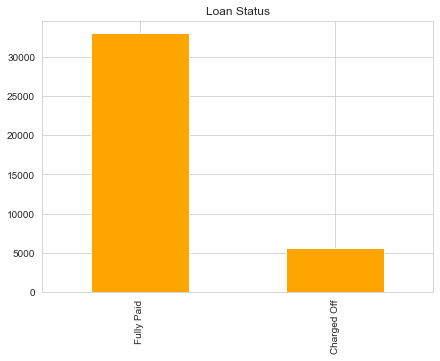

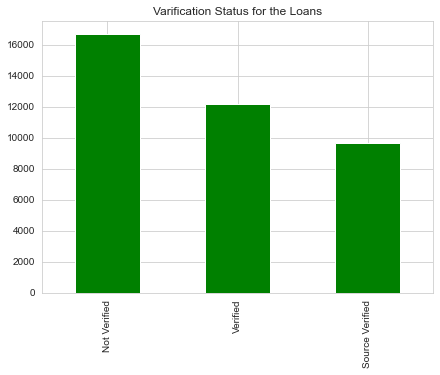

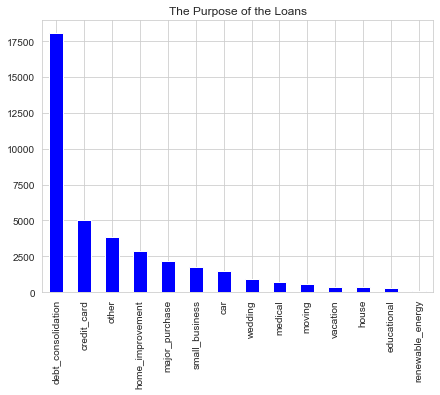

In [34]:
# Analyse Loan Status, Verification Status, and Purpose using data visualization


sns.set_style("whitegrid")  #Choose the background style type

plt.figure(figsize=(7,5))   #Figure size of the report
loans['loan_status'].value_counts().plot.bar(color='orange') #Used bar chart to visualize the column
plt.title("Loan Status")    #Give the title for it
plt.show()                  #Use this fuction to get the chart 


plt.figure(figsize=(7,5))   #Figure size of the report
loans['verification_status'].value_counts().plot.bar(color='g')  #Used bar chart to visualize the column
plt.title("Varification Status for the Loans")   #Give the title for it
plt.show()



plt.figure(figsize=(7,5))                #Figure size of the report
loans['purpose'].value_counts().plot.bar(color='blue') #Used bar chart to visualize the column
plt.title("The Purpose of the Loans")    #Give the title for it
plt.show()                               #Use this fuction to get the chart 

### Insights

- About 13 percent of the loans have turned out to be bad loans (**Loan Status**)
- Majority of the loans have not been verified (**Verification Status**). Unverified loans maybe one reason for  
  loan defaulting.
- Most loans(especially the top three) have no significant purpose. Debt consolidation is to get a single, bigger 
  to clear multiple loans. Credit card spends and unspecified purpose (**Other**) loans. Poor financial management   may turn out to be one of one of the driving factors for the loan defaulting. We have to see that in the 
  Bivariate Analysis.(**From The Purpose of the Loans**) 

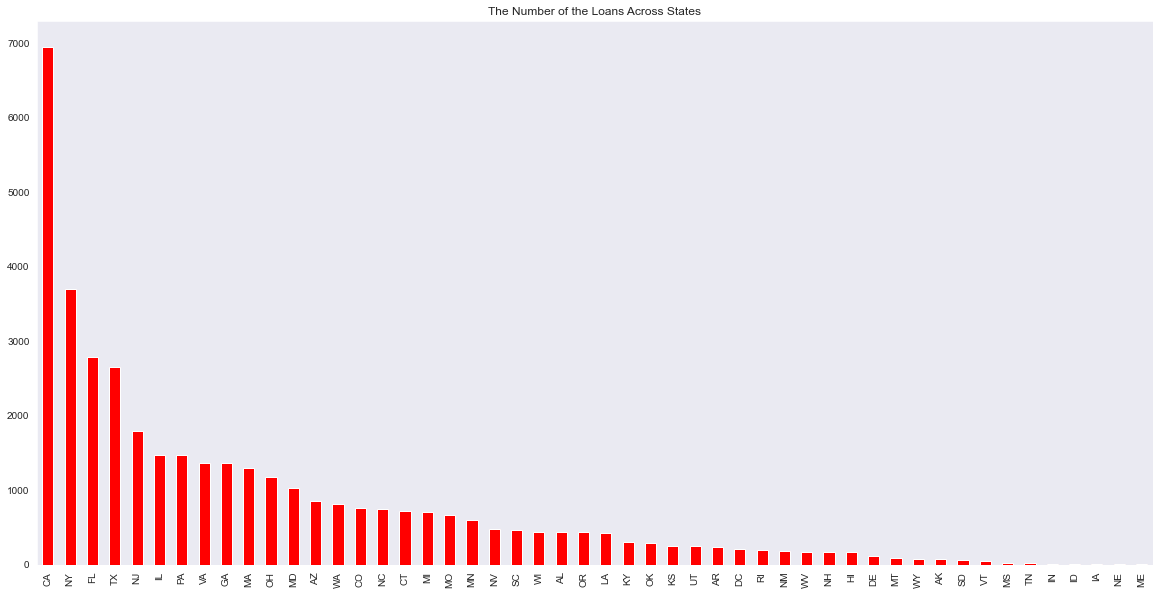

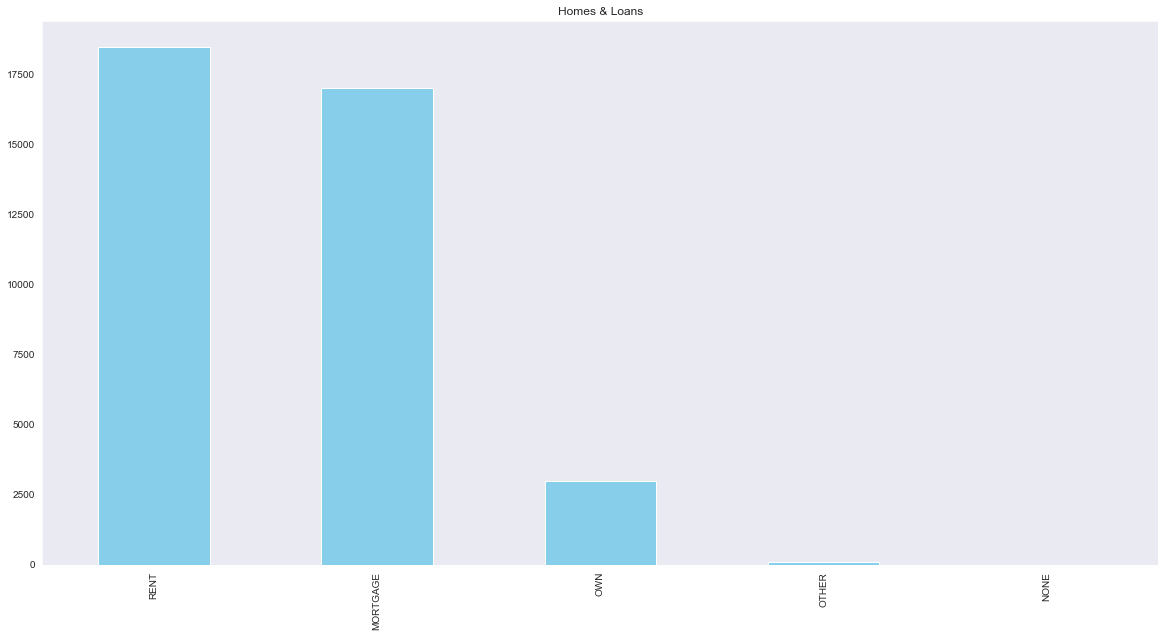

In [35]:
#Now let's us see from which state people are taking more loans

sns.set_style("dark")                             #Choose the background style type


plt.figure(figsize=(20,10))                              #Figure size of the report
loans['addr_state'].value_counts().plot.bar(color='red')  #Used bar chart to visualize the column
plt.title("The Number of the Loans Across States")     #Give the title for it
plt.show()                                             #Use this fuction to get the chart 

plt.figure(figsize=(20,10))                                   #Figure size of the report
loans['home_ownership'].value_counts().plot.bar(color='skyblue')  #Used bar chart to visualize the column
plt.title("Homes & Loans")            #Give the title for it
plt.show()                                                    #Use this fuction to get the chart 

### Insights/Assumptions

If we look at the top three state from where borrowers are, they are California (known for Technology, Thriving Businesses, Immigrants, Homelessness, Expensive homes & rents, etc.) New York (known for Fashion, Arts, Cultural fusion, expensive homes & rentals, and again Immigrants, etc.), and Florida(known for Liesure and Vacations). So there is chance of **unverified**, **insignificant** purpose loans from some the top 13 states may have turned to be bad loans.

When a rented loan-taker changes his or her place, it will be difficult to verify them (**Homes & Loans image**). Thus it leads to an **unverified** loan.

Even **Mortgage** has almost equalled to **Rent** column in the chart. In reality, the Mortgage loans are more defaulted between 2008 and 2011, which resulted in **Subprime Mortgage Crisis** in the United States.

## Ordered Categorical Variables

Let's try to understand what these variables tells through the insights from them
- We will new columns such as **Year** and **Month** and try to elicit insights from them
- We will also have a look at the **Grade** and **Subgrade** columns and see if they become part of the factors for 
  loans defaulting

In [37]:
#Let's have a look at the Ordered Categorical variables

In [38]:
#Let's go with the Date variable

loans['Year']= pd.DatetimeIndex(loans['issue_d']).year #Created a new column called 'Year'

In [39]:
#Let's create a 'Month' column as well

loans['Month']= pd.DatetimeIndex(loans['issue_d']).month

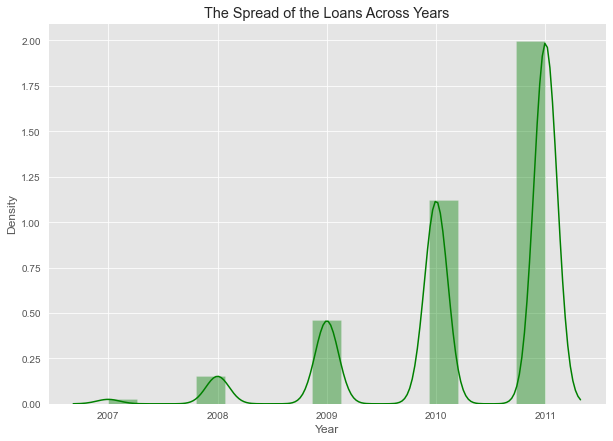

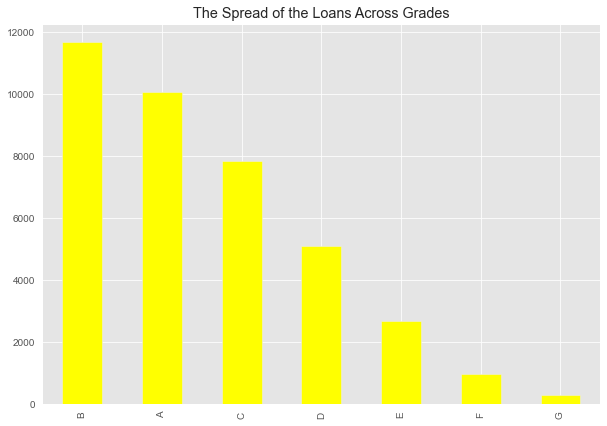

In [40]:
#We are going to plot a chart for the Year  and Grade column

import warnings
warnings.filterwarnings("ignore")                   #Import warnings in case you get any to avoid them


plt.style.use("ggplot")                             #Choose the background style type


plt.figure(figsize=(10,7))                              #Figure size of the report
sns.distplot(loans.Year, bins = 15, color='g')  #Used bar chart to visualize the column
plt.title("The Spread of the Loans Across Years")     #Give the title for it
plt.show()                                             #Use this fuction to get the chart 


plt.figure(figsize=(10,7))                              #Figure size of the report
loans['grade'].value_counts().plot.bar(color = 'Yellow') #Used bar chart to visualize the column
plt.title("The Spread of the Loans Across Grades")     #Give the title for it
plt.show()                                             #Use this fuction to get the chart 

### Insights/Assumptions

There is a high chance of loan defaulting in the year of 2011. We will confirm it through **Bivariate Analysis**. And furthermore, in reality, that year is the crux of Subprime Mortgage crisis in the United States. So the Mortgage loans from **Home Ownership** column give a clue for loans default.

The first three **Grades** contribute to the more number of loans. So a chunk of loan defaults may come from these grades combined with **Mortgage in Home Ownership** or **Unverified from Verification Status** or insignificant purpose from the **Purpose** column. 

## Quantitative Variables

- There are some quantitative variables like **Interest Rate**, **Debt to Income (dti)**, **Income**, **Funded 
  Amount By Investors**, **Funded Amount**, and the **Loan Amount**.
- the **dti** or **FICO Score**(which is not here, and is similar to CIBIL Score in India) is one simple and quick way to get sight of loan defaulters.
  Let's try if **dti** helps us any way out.


In [41]:
# Describe the Debt to Income ratio to understand max, mean, and min values

loans['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

### Comment

Going by the values at hand above, the maximum **dti** value is around 29.99, which is far below 40%. Above this value (40 percent) means the borrower more likely to default a loan. So the **dti** is not gonna be a deciding factor, in this context, for a loan default.

In [42]:
# Describe Funded Amount by Investors

loans['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

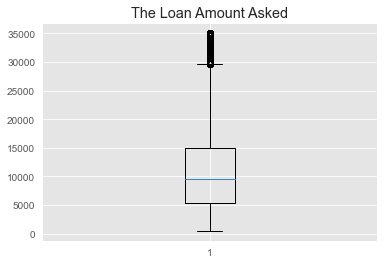

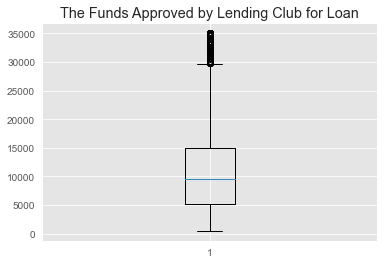

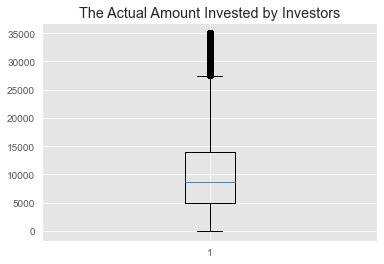

In [43]:
#Box plot the Loan Amount, Funded Amount, Funded Amount by Investors


loan_asked = np.array(loans.loan_amnt)        #Covert the column to np array
plt.boxplot(loan_asked)                       #Plot the column using box
plt.title("The Loan Amount Asked")            #Give a title to it
plt.show()

funded_approved = np.array(loans.funded_amnt)
plt.boxplot(funded_approved)
plt.title("The Funds Approved by Lending Club for Loan")
plt.show()


funded_invested = np.array(loans.funded_amnt_inv)
plt.boxplot(funded_invested)
plt.title("The Actual Amount Invested by Investors")
plt.show()

In [44]:
# Let's describe Funds approved by the agency

loans['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [45]:
#Checking the values above the 75th percentile

loans[loans['funded_amnt_inv']>=15000]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,Year,Month
20,1069740,20250,20250,19142.16108,60,15.27,C,C4,3,RENT,43370.0,Verified,2011-12-01,Fully Paid,debt_consolidation,TX,26.53,2011,12
21,1039153,21000,21000,21000.00000,36,12.42,B,B4,10,RENT,105000.0,Verified,2011-12-01,Charged Off,debt_consolidation,FL,13.22,2011,12
25,1069697,15000,15000,15000.00000,36,9.91,B,B1,2,MORTGAGE,92000.0,Verified,2011-12-01,Fully Paid,credit_card,IL,29.44,2011,12
31,1069539,31825,31825,31825.00000,36,7.90,A,A4,5,MORTGAGE,75000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,NJ,14.03,2011,12
37,1069357,15000,15000,15000.00000,36,7.90,A,A4,1,RENT,45000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,OH,8.48,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37496,379586,20000,20000,19950.00000,36,16.95,E,E5,3,MORTGAGE,115000.0,Verified,2009-02-01,Fully Paid,debt_consolidation,NV,15.74,2009,2
37499,379570,17500,17500,15722.30000,36,12.84,C,C2,4,RENT,50000.0,Source Verified,2009-02-01,Fully Paid,debt_consolidation,CA,14.21,2009,2
37510,379338,20000,20000,17550.00000,36,12.21,B,B5,4,MORTGAGE,70834.0,Verified,2009-02-01,Fully Paid,medical,CO,15.69,2009,2
38878,309948,23575,18600,16050.00000,36,14.50,E,E2,3,RENT,75000.0,Verified,2008-04-01,Fully Paid,credit_card,NC,22.74,2008,4


In [46]:
#Checking the values on the lower side of the outliers

loans[loans['funded_amnt_inv']<=500]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,Year,Month
17818,709526,12000,12000,400.00000,36,7.66,A,A5,0,OWN,30000.0,Not Verified,2011-03-01,Fully Paid,car,SC,3.04,2011,3
22202,632676,1000,1000,500.00000,36,6.54,A,A4,10,MORTGAGE,70000.0,Verified,2010-12-01,Fully Paid,vacation,NC,12.82,2010,12
22593,626701,1000,1000,500.00000,36,9.99,B,B4,4,MORTGAGE,85000.0,Source Verified,2010-12-01,Fully Paid,major_purchase,AR,2.84,2010,12
36815,395081,10000,7500,500.00000,36,12.84,C,C2,1,RENT,35004.0,Source Verified,2009-05-01,Fully Paid,debt_consolidation,NY,21.36,2009,5
37808,371976,1000,1000,209.19836,36,14.74,D,D3,1,RENT,10000.0,Not Verified,2009-01-01,Fully Paid,small_business,MA,1.20,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39700,98276,5400,5400,200.00000,36,7.75,A,A3,1,RENT,8000.0,Not Verified,2007-07-01,Fully Paid,educational,GA,3.00,2007,7
39705,93061,5000,5000,250.00000,36,7.43,A,A2,8,MORTGAGE,120000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.29,2007,7
39706,92676,5000,5000,150.00000,36,8.07,A,A4,1,MORTGAGE,180000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,WI,5.55,2007,7
39708,92552,5000,5000,375.00000,36,9.96,B,B5,4,MORTGAGE,48000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,FL,8.03,2007,7


### Comment

- There are outliers in the loans data, which we are not manipulating here. Three-fourths of the loans are under 15000. The outliers with 15000 to 20000 more, on the upward-side, are influencing the data.
- There are about 25 percent of loans above the 75th percentile. These outliers influence the data analysis overwhelmingly.  
- On the otherhand, the outliers on the lower side is quite a few

# Bivariate Analysis

So far we tried to understand what a different column says and tried to draw insights from them as much as possible. Now let's segment the columns into two groups and try to understand the driving factors for a loan default.

we have:
- A table for **Funded Amound by Investors** below 10000, but the loan status is **Charged Off**. The question to 
  ask is why the borrowers defaulted the loans when the funded amount is less?
- Another table for **Funded Amound by Investors** above 10000, but the loan status is **Charged Off**. We ask the 
  same question here to: why they charged off when the funded amount is more?
  
In the following sections, we will find out the answers for the above questions. And the value **10000** is **assumed** as it is close to the median value in the **Funded Amount by Investors**.

Now, we need ask questions and visualize the loans data between two or so columns to come to a conclusion about a loan default.


In [47]:
# Creating a  loan type table from Funded Amount by Investors and the Loan Status 'Charged Off'

loan_more = loans[(loans['funded_amnt_inv']>=10000) &(loans['loan_status']=='Charged Off')]

In [48]:
# Creating a  loan type table from Funded Amount by Investors and the Loan Status 'Charged Off'


loan_less = loans[(loans['funded_amnt_inv']<=10000) &(loans['loan_status']=='Charged Off')]

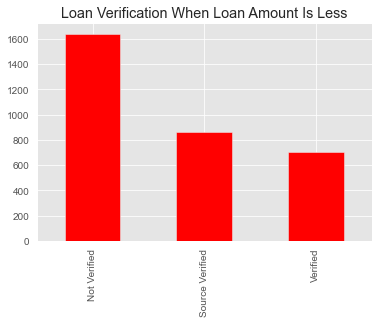

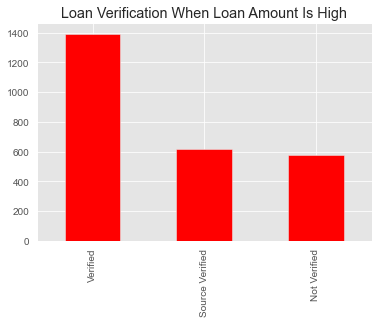

In [49]:
#Let's first check the verification status 

loan_less['verification_status'].value_counts().plot.bar(color='red') #Use bar plot to see the number of loans 

plt.title("Loan Verification When Loan Amount Is Less")               #Give it a title
plt.show()                                                            #Use show function for display 


loan_more['verification_status'].value_counts().plot.bar(color='red') #Use bar plot to see the number of loans 

plt.title("Loan Verification When Loan Amount Is High")               #Give it a title
plt.show()                                                            #Use show function for display 

In [50]:
# Get a table for overall Charged Off loans

loan_overall = loans[loans['loan_status']=='Charged Off']


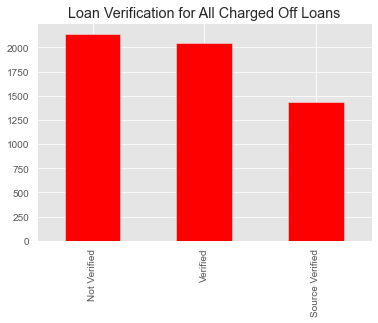

In [51]:
# From Overall Charged off Loans, Checking whether a loan is verified or not

loan_overall['verification_status'].value_counts().plot.bar(color='red')
plt.title('Loan Verification for All Charged Off Loans')
plt.show()

### Insights

- There are more **Charged Off** loans when the loan application is not verified and the amount is less (<10000)
- There are more **Charged Off** loans when the loan application is verified and the amount is more (>10000)
- Overall, the **Not Verified** loans are slightly more than the **Verified** loans in the **Charged Off** status

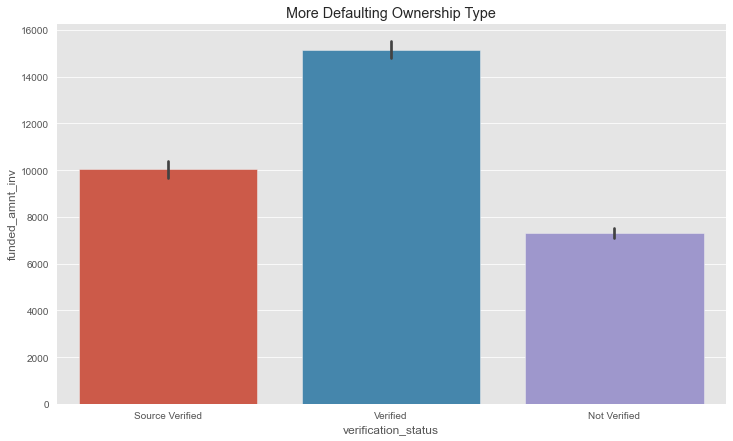

In [52]:
plt.figure(figsize=(12,7))                                                        #Select the figure size
sns.barplot(data =loan_overall, x = "verification_status", y = "funded_amnt_inv") #Plot a bar for those columns

plt.title("More Defaulting Ownership Type")                                       #Give a title for the plot
plt.show()

### Insight

More funds are poured into the **Source Verified** and **Verified** loans by the investors, which is obviously done by any investor. So verification status is not going to be driving factor for a loan defaulting.

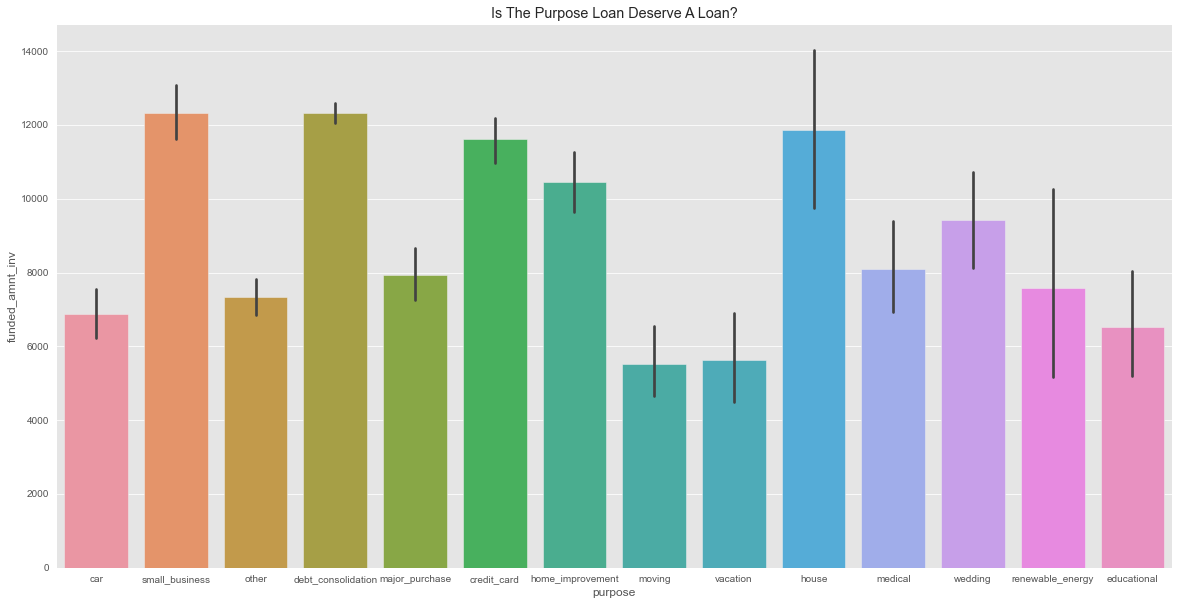

In [53]:
#Plot a bar between Purpose and the Funded Amount by Investors

plt.figure(figsize=(20,10))                                                        #Select the figure size
sns.barplot(data =loan_overall, x = "purpose", y = "funded_amnt_inv", estimator = np.mean)  #Plot a bar for those columns

plt.title("Is The Purpose Loan Deserve A Loan?")                                  #Give a title for the plot
plt.show()

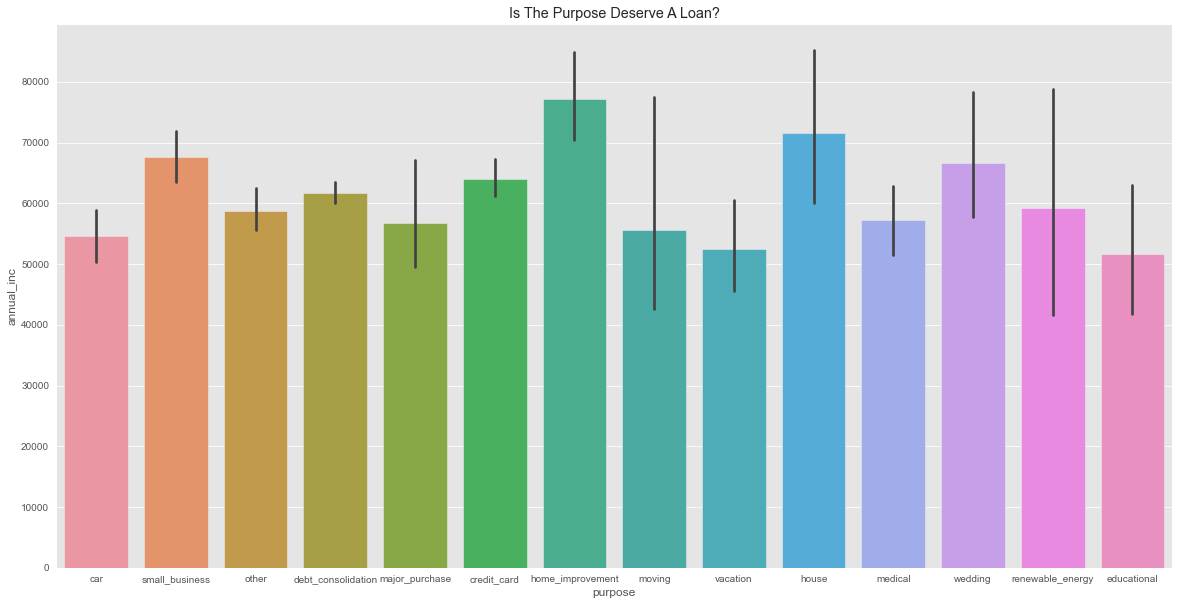

In [54]:
#Plot a bar between Purpose and the Annual Income 

plt.figure(figsize=(20,10))                                                        #Select the figure size
sns.barplot(data =loan_overall, x = "purpose", y = "annual_inc", estimator = np.mean)  #Plot a bar for those columns

plt.title("Is The Purpose Deserve A Loan?")                                  #Give a title for the plot
plt.show()

### Insights

- The **Small Business** loans are more **Charged Off** loans. Secondly, the **Debt Consolidation** loans bagged the second spot. And the next is **Credit Card**. We can't ignore **Home Improvement** and **House** as they are accounted for the Subprime Lending Crisis.

- The **Small Businesses** borrowers may pay back or may not. The **Debt Consolidation** and **Credit Card** loans are risky and unsecured loans, as the applicants are Serial Debtors (arent't they?).

So the purpose of the loan borrower is going to be a driving factor for a loan default.

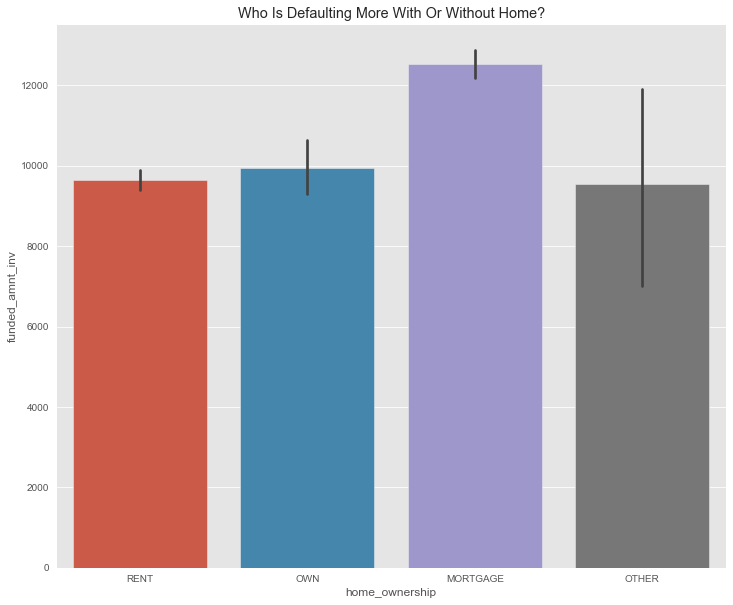

In [55]:
#Plot a bar between Home Ownership and the Funded Amount by Investors

plt.figure(figsize=(12,10))                                                        #Select the figure size
sns.barplot(data =loan_overall, x = "home_ownership", y = "funded_amnt_inv", estimator = np.mean)  #Plot a bar for those columns

plt.title("Who Is Defaulting More With Or Without Home?")                                  #Give a title for the plot
plt.show()

### Insights

If the borrowers are mortgaging, they are more likely to default their loans

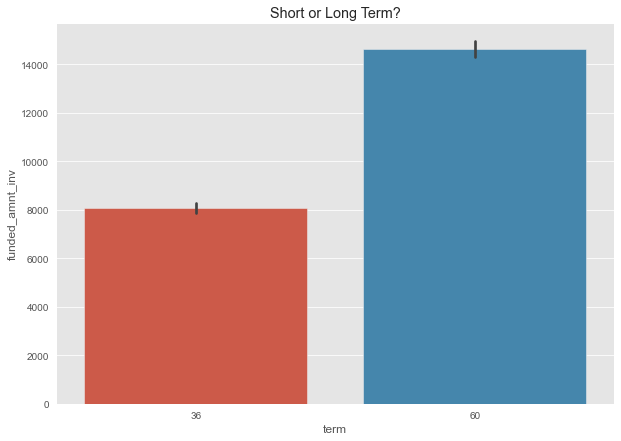

In [56]:
#Plot a bar between Term and the Funded Amount by Investors

plt.figure(figsize=(10,7))                                                        #Select the figure size
sns.barplot(data =loan_overall, x = "term", y = "funded_amnt_inv")  #Plot a bar for those columns

plt.title("Short or Long Term?")                                  #Give a title for the plot
plt.show()

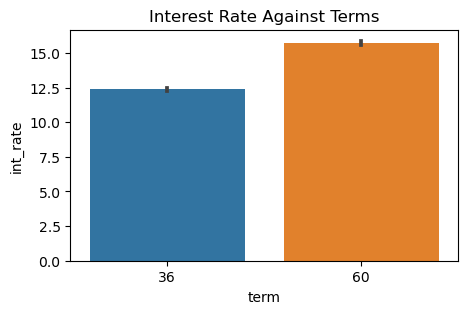

In [61]:
#Plot a bar between Term and the Interest Rate

plt.style.use("default")
plt.figure(figsize=(5,3))                                                        #Select the figure size
sns.barplot(data =loan_overall, x = "term", y = "int_rate")                      #Plot a bar for those columns

plt.title("Interest Rate Against Terms")                                  #Give a title for the plot
plt.show()

### Insight

The longer a loan term is, the more likely a borrower is gonna default it. Even the **Interest Rate** against **Term** prove it all. The long term loans with high interest rates are one of the driving factors for loans defaulting.

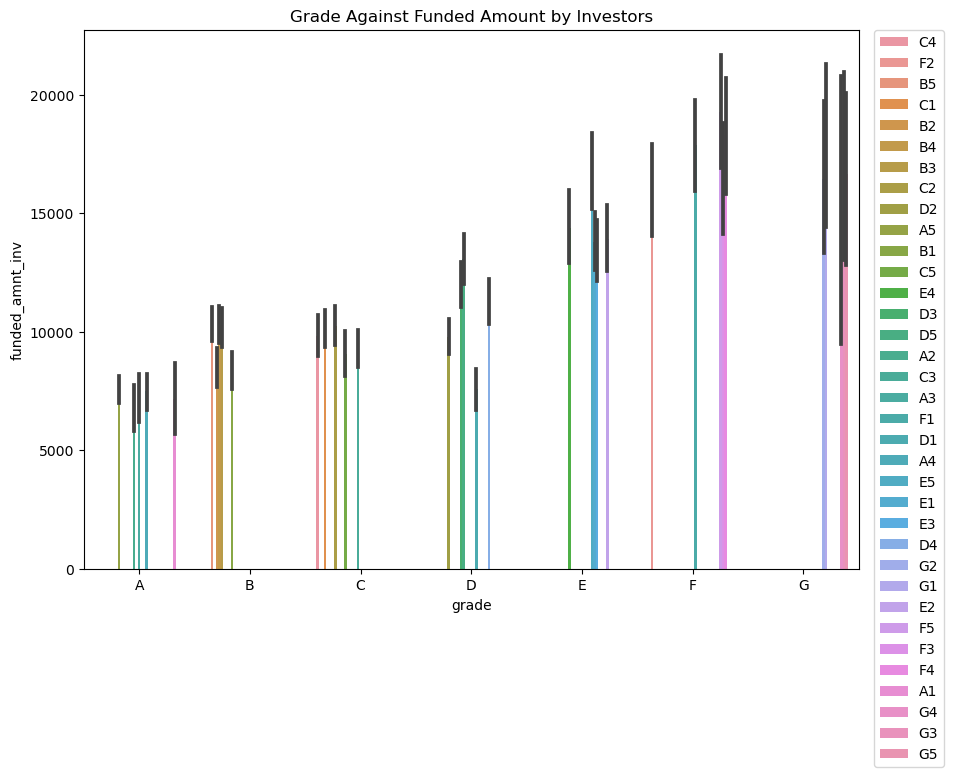

In [62]:
#Let's understand Charged Off loans in the Funded Amount by Investors in the interest rate point of view

plt.figure(figsize=(10,7))   #Choose the figure size
sns.barplot(data = loan_overall, y='funded_amnt_inv', x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue ='sub_grade')
plt.title("Grade Against Funded Amount by Investors") #Give the bar chart a title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) #Adjust the legend outside
plt.show()

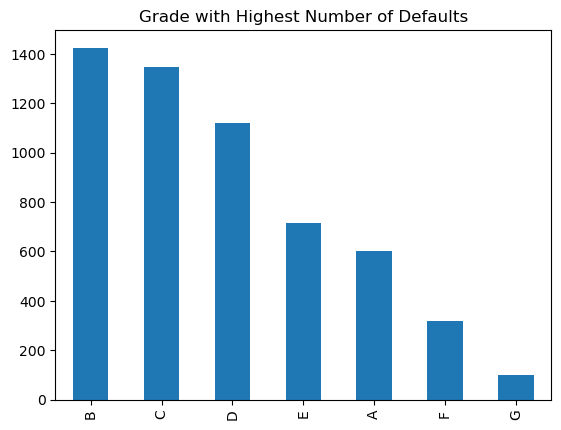

In [59]:
#And let's see which grade loans constitue more from the Charged Off loans

loan_overall['grade'].value_counts().plot.bar() #Plot a bar graph
plt.title("Grade with Highest Number of Defaults")
plt.show()     

In [60]:
#Let's us B grade loans below 10000 from the Charged Off loans

loan_overall[(loan_overall['grade']=='B') & (loan_overall['funded_amnt_inv']<=10000)]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,Year,Month
9,1071570,5375,5375,5350.000000,60,12.69,B,B5,1,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,2011,12
14,1069057,10000,10000,10000.000000,36,10.65,B,B2,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,CA,7.06,2011,12
24,1069559,6000,6000,6000.000000,36,11.71,B,B3,1,RENT,76000.0,Not Verified,2011-12-01,Charged Off,major_purchase,CA,2.40,2011,12
64,1069126,10000,10000,9975.000000,60,10.65,B,B2,10,RENT,45996.0,Verified,2011-12-01,Charged Off,debt_consolidation,OH,21.73,2011,12
100,1068509,6200,6200,6200.000000,36,9.91,B,B1,2,RENT,25000.0,Not Verified,2011-12-01,Charged Off,debt_consolidation,CA,20.64,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39554,157169,25000,25000,499.999401,36,9.01,B,B2,10,MORTGAGE,616000.0,Not Verified,2007-11-01,Charged Off,small_business,FL,3.83,2007,11
39578,148473,10000,10000,1825.004738,36,9.01,B,B2,1,MORTGAGE,275000.0,Not Verified,2007-11-01,Charged Off,home_improvement,NY,2.97,2007,11
39600,140036,4000,1000,550.000000,36,9.96,B,B5,1,RENT,35000.0,Not Verified,2007-10-01,Charged Off,other,NJ,5.83,2007,10
39653,123228,20000,20000,975.000000,36,9.64,B,B4,1,RENT,96000.0,Not Verified,2007-09-01,Charged Off,small_business,NY,2.86,2007,9


### Insights

This is what we can understand from **Grade Against Funded Amount by Investors** and from the **Grade with Highest Number of Defaulters**:

- Smaller amount of loans with **Not Verified** status contribute to the loan defaulting

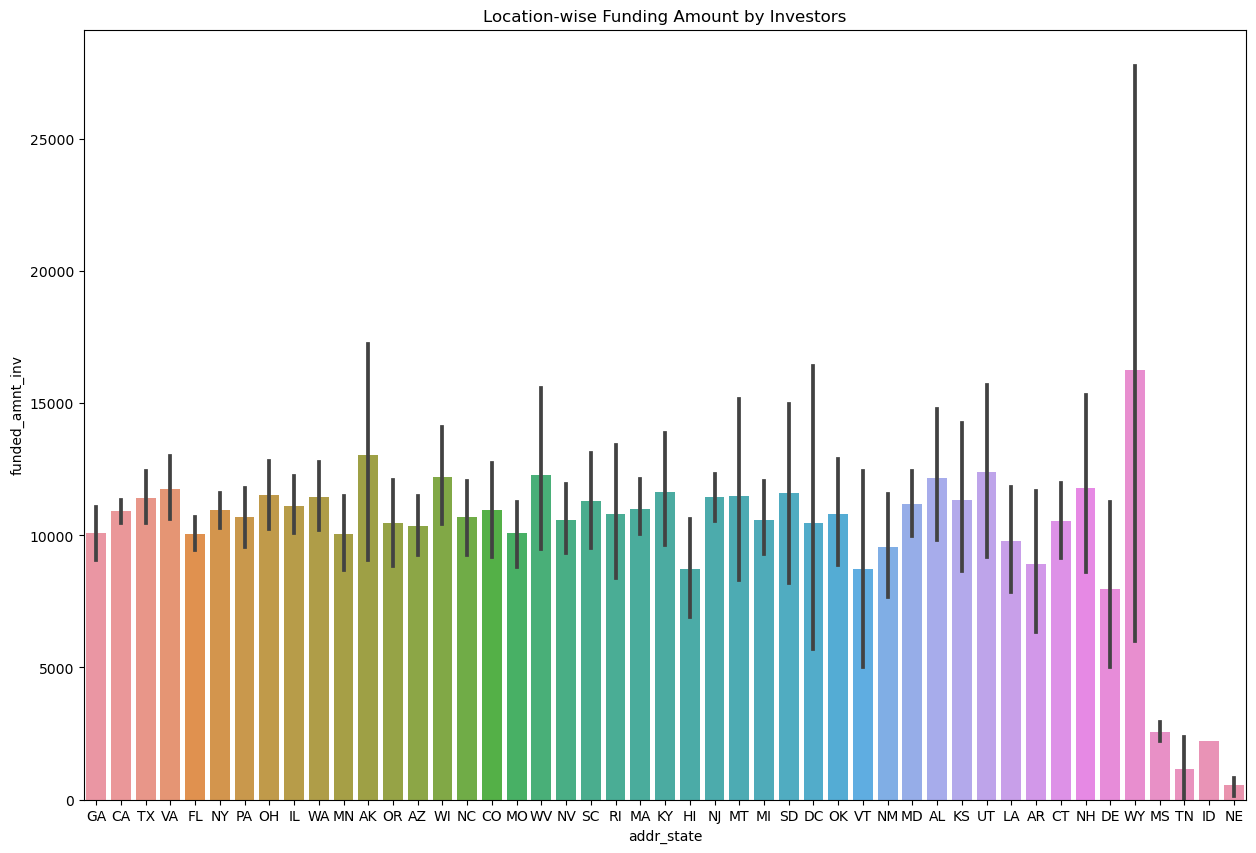

In [67]:
#Let's understand Charged Off loans in the Funded Amount by Investors in the address point of view

plt.figure(figsize=(15,10))   #Choose the figure size
sns.barplot(data = loan_overall, y='funded_amnt_inv', x='addr_state')
plt.title("Location-wise Funding Amount by Investors") #Give the bar chart a title
plt.show()

### Insight

All most all states score well in the **Charged Off** loans except Nevada (NE), Tennessee (TN), Idaho(ID), and Mississippi (MS).

# Recommendations

These are recommendations we can make from the Analysis of the above loans data:

1. Verify the loans if the loan amount is less (**Verification Status** and **Funded Amount by Investors**)
2. Give loans to the right purpose. The loans for the debt consolidation, small business, and credit card types are 
   riskier. (**Purpose**).
3. Make changes to the duration of a loan term. (**Term**)
4. Mortgage Loans bring you loss. So avoid them. (**Home Ownership**)
